### Related to figure 5f-i

In [1]:
suppressMessages({library(Seurat)
library(ggplot2)
library(ggpubr)
library(glue)
library(dplyr)
library(cowplot)
library(org.Hs.eg.db)
library(org.Mm.eg.db)
library(biomaRt)
library(pheatmap)})


In [2]:
ensembl_hsapiens <- useMart("ensembl", 
                              dataset = "hsapiens_gene_ensembl")
ensembl_mouse <- useMart("ensembl", 
                           dataset = "mmusculus_gene_ensembl")


median_fun <- function(x){
  return(data.frame(y = max(x), label = round(median(x),3)))
}


In [6]:
library(msigdbr)
all_gene_sets <- msigdbr(species = "Mus musculus")
all_gene_sets <- as.data.frame(all_gene_sets)
gl <- list()
gl[['KEGG_TRYPTOPHAN_METABOLISM']] = all_gene_sets$gene_symbol[all_gene_sets$gs_name == 'KEGG_TRYPTOPHAN_METABOLISM']

In [3]:
obj <- readRDS('/data/yuchen_data/Stereo_seq/All_Figures/Figure5/1.data/Tumor.final.rds')
obj

An object of class Seurat 
23156 features across 43355 samples within 1 assay 
Active assay: RNA (23156 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [7]:
df_cur = Seurat:::PseudobulkExpression(object = obj, pb.method = 'aggregate', slot = 'counts', assays='RNA', group.by='sample')$"RNA"
obj_tmp <- CreateSeuratObject(counts=df_cur, project='scRNA', min.cells=0, min.features=0)
obj_tmp <- NormalizeData(obj_tmp, normalization.method = "LogNormalize", scale.factor = 10000)
obj_tmp <- ScaleData(obj_tmp, features=row.names(obj_tmp))
df_norm = as.data.frame(obj_tmp@assays$RNA@data)

used_genes = intersect(row.names(df_norm), gl[['KEGG_TRYPTOPHAN_METABOLISM']])
df_norm = df_norm[used_genes, ]

Centering and scaling data matrix



In [14]:
used_samples = c('ST-M-H-T-4345', 'ST-M-S-T-4947-add','ST-M-L-T-5566')
df_norm_1 = df_norm[used_genes, used_samples]
head(df_norm_1)

,ST-M-H-T-4345,ST-M-S-T-4947-add,ST-M-L-T-5566
,<dbl>,<dbl>,<dbl>
Aox1,0.071115459,0.19396490,0.20129149
Acmsd,0.003080584,0.02035784,0.01567011
Aldh9a1,0.203687480,0.26182279,0.28220354
Kmo,0.101925559,0.04056937,0.02791800
Kynu,0.157620467,0.06368683,0.04293583
Cat,0.529635877,0.22620570,0.24938079


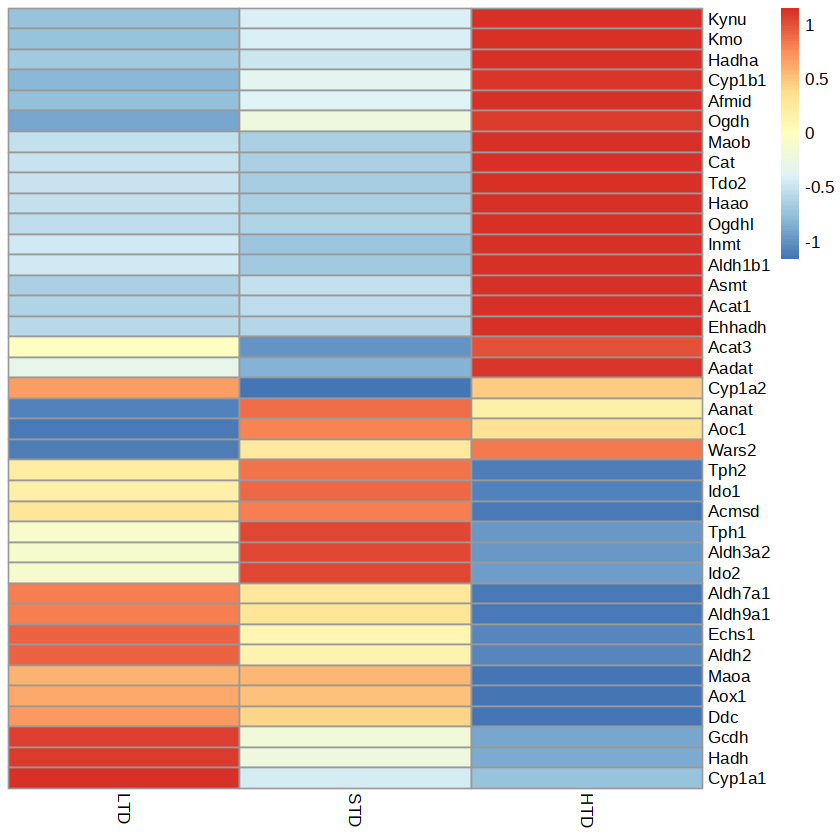

In [19]:
new_order = c("Cyp1a1",
"Hadh",    "Gcdh",    "Ddc",     "Aox1",    "Maoa",    "Aldh2",   "Echs1",
"Aldh9a1", "Aldh7a1", "Ido2",    "Aldh3a2", "Tph1",    "Acmsd",   "Ido1",    "Tph2",    "Wars2",  "Aoc1",    "Aanat",   "Cyp1a2",  "Aadat",
"Acat3",   "Ehhadh",  "Acat1",   "Asmt",   "Aldh1b1", "Inmt",    "Ogdhl",
"Haao",    "Tdo2",    "Cat",     "Maob",    "Ogdh",    "Afmid",   "Cyp1b1",
"Hadha",   "Kmo",     "Kynu")
df_norm_2 = df_norm_1[new_order, used_samples]
colnames(df_norm_2) = c('HTD', 'STD', 'LTD')
df_norm_2 = df_norm_2[rev(row.names(df_norm_2)), rev(colnames(df_norm_2))]
pheatmap(df_norm_2, scale='row', cluster_cols=F, cluster_rows=F)


In [32]:
df_metabolites = read.table('/data/yuchen_data/Stereo_seq/All_Figures/Figure5/1.data/preheatmap.txt', row.names=1, header=T, sep='\t')
colnames(df_metabolites) = c('HTD', 'LTD', 'STD')
head(df_metabolites)

,HTD,LTD,STD
,<dbl>,<dbl>,<dbl>
3-HAA,74.6175,28.826667,16.9225
3-HK,330.8350,48.530000,160.8375
5-HIAA,130.9450,54.116667,63.5000
5-HT,639.6050,231.956667,364.6025
5-HTOL,5.4975,3.330000,3.6200
5-HTP,8.8575,2.636667,5.1650


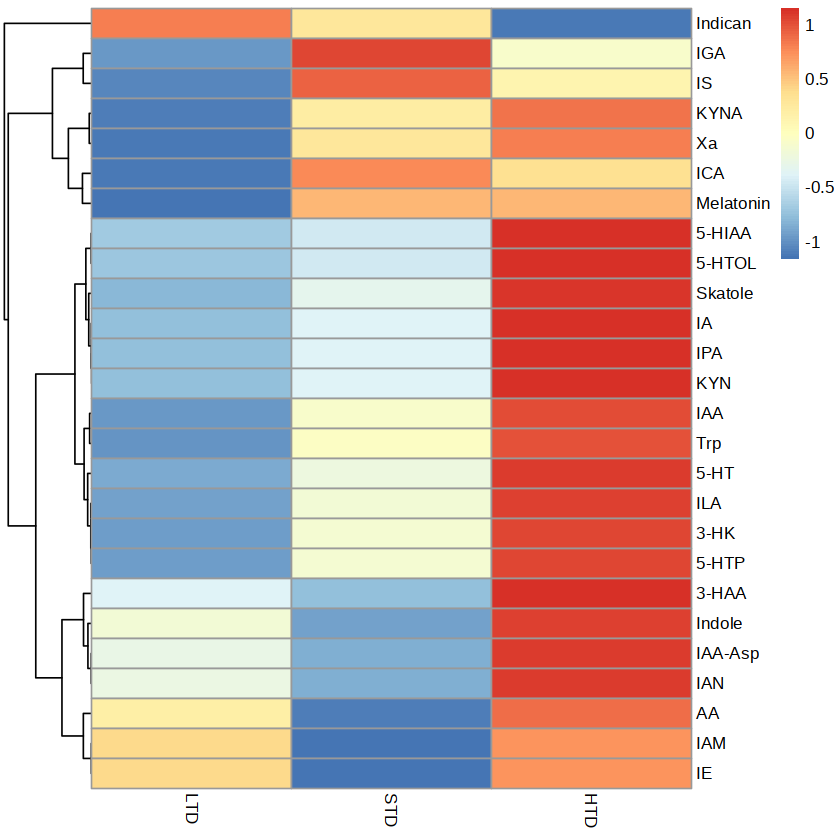

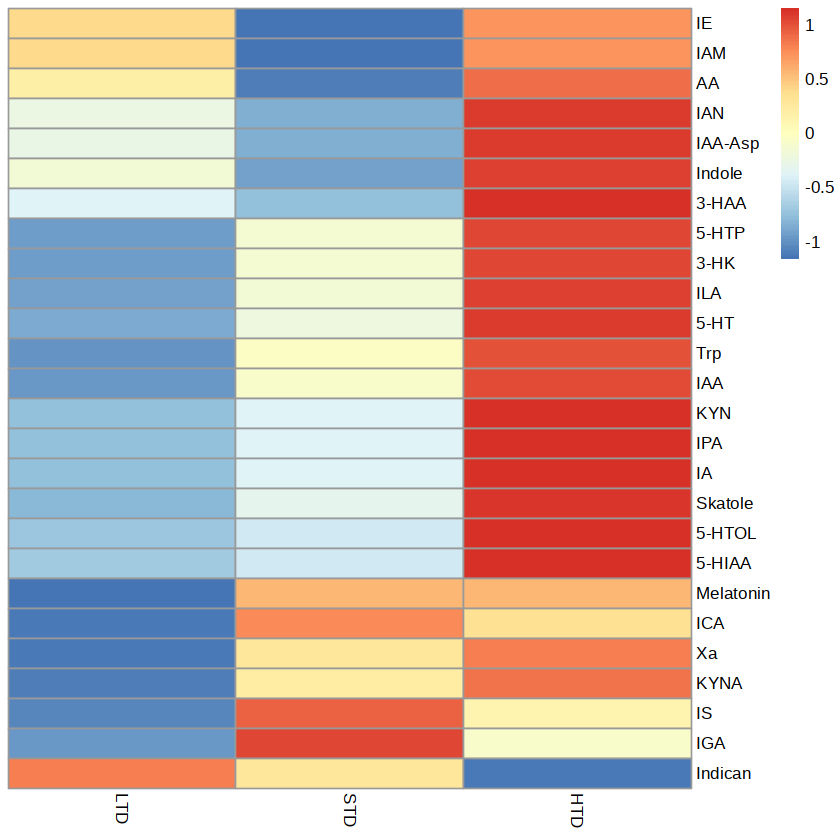

In [43]:
df_metabolites <- df_metabolites[, rev(c('HTD', 'STD', 'LTD'))]

p <- pheatmap(df_metabolites, scale='row', cluster_cols=F, cluster_rows=T)
new_order = row.names(df_metabolites)[rev(p$tree_row$order)]
df_metabolites <- df_metabolites[new_order, ]
pheatmap(df_metabolites, scale='row', cluster_cols=F, cluster_rows=F)